In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [21]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [24]:
model.compile(optimizer= rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [25]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경

In [26]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Input scaling

In [27]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

## Early Stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [34]:
history = model.fit(train_images, train_labels_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0453 - accuracy: 0.9879 - val_loss: 0.0914 - val_accuracy: 0.9743
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0444 - accuracy: 0.9884 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0435 - accuracy: 0.9887 - val_loss: 0.0896 - val_accuracy: 0.9746
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0422 - accuracy: 0.9890 - val_loss: 0.0882 - val_accuracy: 0.9747
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0411 - accuracy: 0.9892 - val_loss: 0.0889 - val_accuracy: 0.9755
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0403 - accuracy: 0.9896 - val_loss: 0.0908 - val_accuracy: 0.9745
Epoch 

In [40]:
import matplotlib.pyplot as plt

# 비용함수값 확인하기

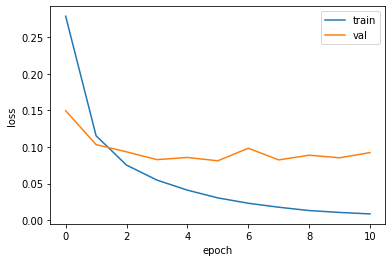

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

위의 그림에서 epoch = 0이 첫번째 epoch 임 <br>
fit() 함수의 결과 부분에서는 epoch=1 부터 출력

# Accuracy 확인하기

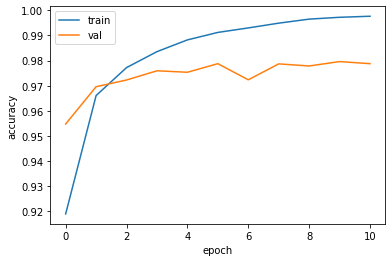

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [43]:
best_model = models.load_model('best_model.h5')

In [45]:
best_model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9800


[0.06819715350866318, 0.9800000190734863]

In [46]:
model.evaluate(test_images, test_labels_one_hot)
# 이건 최종 학습을 마친 후 결과를 이용한 것

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9813


[0.07498710602521896, 0.9812999963760376]